In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.cm as cm

In [52]:
df=pd.read_csv('1000_Companies.csv')

In [26]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [27]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [18]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [24]:
df.State.value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

California made the highest profit

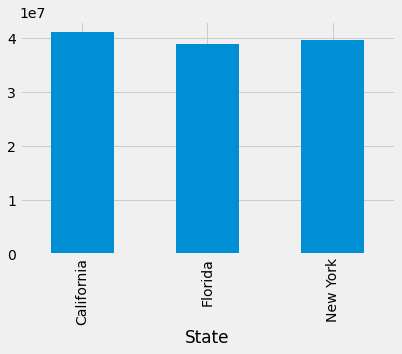

In [47]:
#plt.figure(figsize = (6.8,7.3))
plt.style.use('fivethirtyeight')
df.groupby('State')['Profit'].sum().plot(kind='bar')
plt.show()

In [53]:
 df.drop(['R&D Spend', 'Administration', 'State'], axis = 1, inplace=True)

In [54]:
df

,Marketing Spend,Profit
0,471784.1000,192261.83000
1,443898.5300,191792.06000
2,407934.5400,191050.39000
3,383199.6200,182901.99000
4,366168.4200,166187.94000
...,...,...
995,173232.6695,95279.96251
996,329204.0228,164336.60550
997,227142.8200,413956.48000
998,281692.3200,333962.19000


In [55]:
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [58]:
X

array([[471784.1    ],
       [443898.53   ],
       [407934.54   ],
       [383199.62   ],
       [366168.42   ],
       [362861.36   ],
       [127716.82   ],
       [323876.68   ],
       [311613.29   ],
       [304981.62   ],
       [229160.95   ],
       [249744.55   ],
       [249839.44   ],
       [252664.93   ],
       [256512.92   ],
       [261776.23   ],
       [264346.06   ],
       [282574.31   ],
       [294919.57   ],
       [     0.     ],
       [298664.47   ],
       [299737.29   ],
       [303319.26   ],
       [304768.73   ],
       [140574.81   ],
       [137962.62   ],
       [134050.07   ],
       [353183.81   ],
       [118148.2    ],
       [107138.38   ],
       [ 91131.24   ],
       [ 88218.23   ],
       [ 46085.25   ],
       [214634.81   ],
       [210797.67   ],
       [205517.64   ],
       [201126.82   ],
       [197029.42   ],
       [185265.1    ],
       [174999.3    ],
       [172795.67   ],
       [164470.71   ],
       [148001.11   ],
       [ 35

In [59]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [61]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=.3, random_state=45)

In [62]:
#training the model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(X_test)
y_pred

array([180628.68393175,  53308.23540867, 171932.02804116,  98645.03770264,
        83870.43403114, 167021.95038973,  70343.23288141, 157435.36908675,
       114335.86674464,  71748.86296268, 183859.37269335, 108105.20439438,
       169263.9261674 , 116433.49981341, 162871.19758753, 126346.58241586,
       166908.09350408,  55113.2017237 , 154260.77154288, 156354.56598492,
        89318.82030091, 170806.8542221 ,  74202.64601583, 126120.54300796,
       161393.56979271, 109921.05407594, 138958.7426586 ,  77846.90314794,
       157458.81021792, 103226.10250949, 134580.27612848, 122058.53164021,
        62727.38012302, 141142.11563003, 110096.86249466, 175493.40405414,
       113921.95113572,  82947.02130709, 110462.71142111,  65466.64254164,
        58638.57887991, 157375.09191709,  98422.34706497, 168924.02991724,
       168308.70049511,  81478.60251105, 150462.4728032 , 139013.99673802,
        53259.67880026,  78109.77855092, 225909.16628102,  99493.10398632,
        96243.16000208,  

# scatter plot of the Profit by market spend

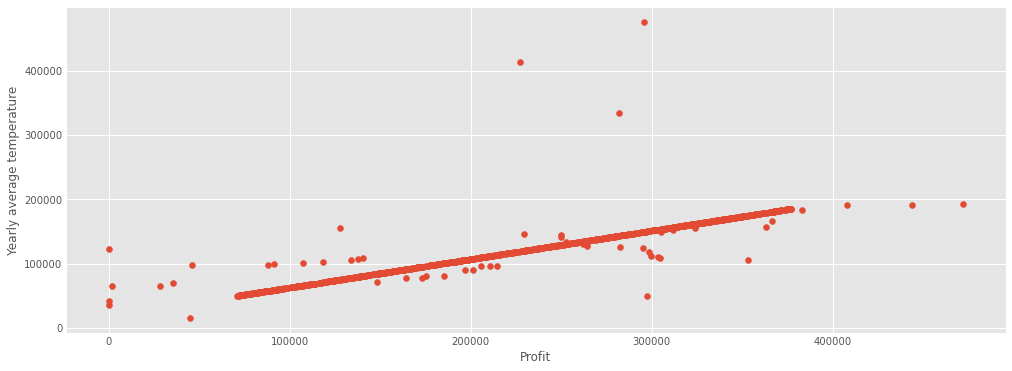

In [89]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.ylabel('Yearly average temperature')
plt.xlabel('Profit')
plt.show()

# training result

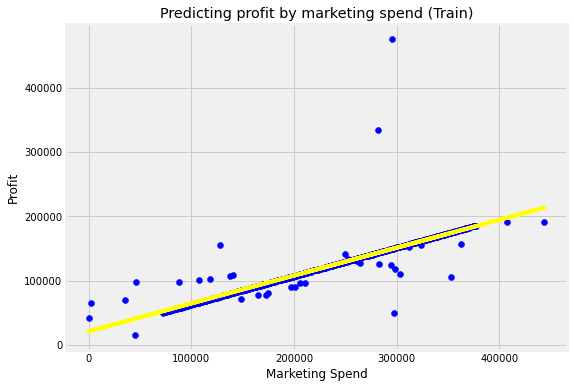

In [81]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, c ='b')
plt.plot(X_train, lr.predict(X_train), color ='yellow')
plt.title('Predicting profit by marketing spend (Train)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

# testing result

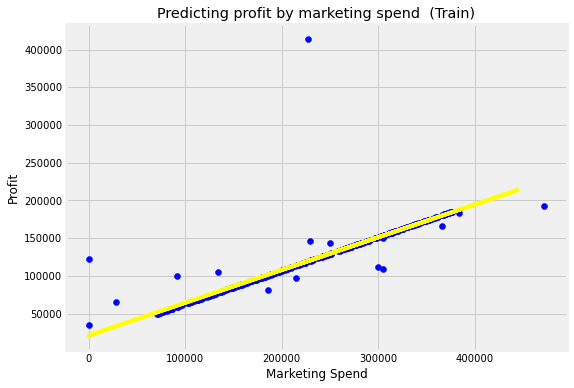

In [82]:
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, c ='b')
plt.plot(X_train, lr.predict(X_train), color ='yellow')
plt.title('Predicting profit by marketing spend  (Train)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 3208.7931860880794
MSE: 357145767.3622244
RMSE: 56.64621069487419


In [91]:
SM=pd.read_csv('SocialNetworkAds.csv')

In [92]:
SM

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


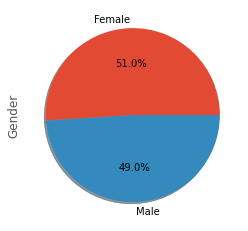

<Figure size 864x432 with 0 Axes>

In [119]:

SM['Gender'].value_counts().plot(kind= 'pie', autopct='%1.1f%%',shadow=True)
plt.figure(figsize = (12,6))
plt.show()

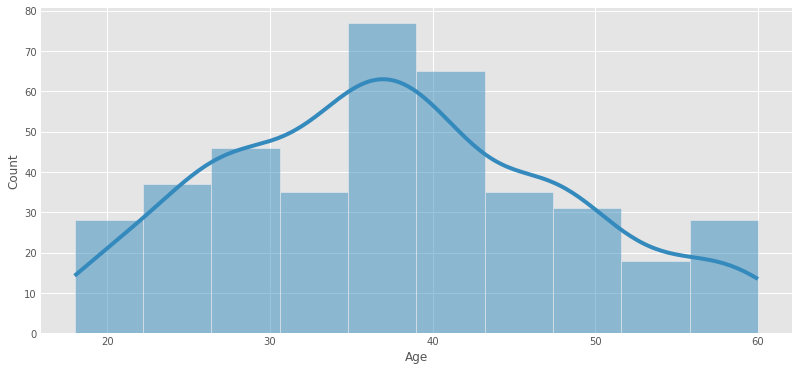

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(SM.Age, kde=True)
plt.show()

Estimated Salary based on Gender

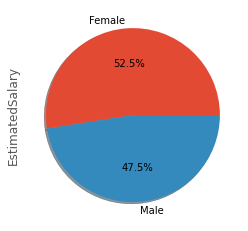

In [117]:
SM.groupby('Gender')['EstimatedSalary'].sum().plot(kind= 'pie', autopct='%1.1f%%',shadow=True)
plt.show()

Customers that may purchase based on salary

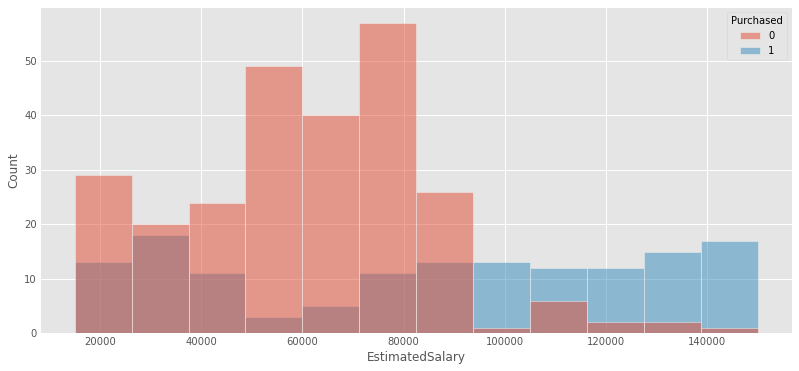

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(SM, x='EstimatedSalary', hue='Purchased')
plt.show()

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
df_music=pd.read_csv('music.csv')

In [177]:
df_music

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [127]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


Musical Genre by age Group

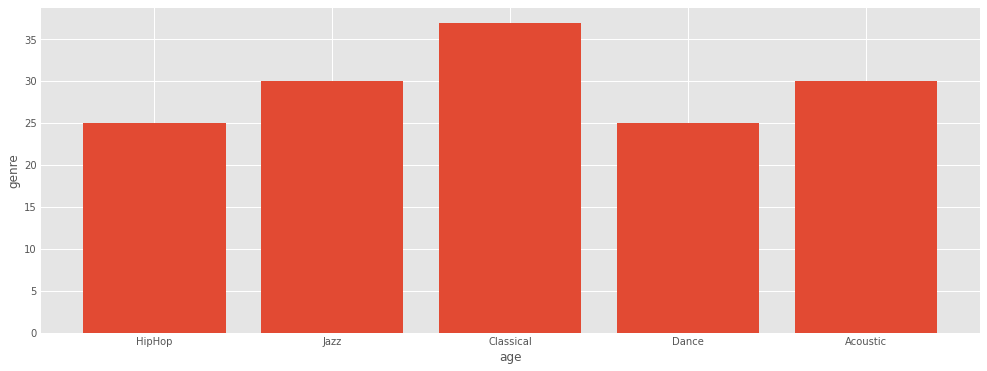

In [135]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.bar(df_music['genre'], df_music['age'])
plt.ylabel('genre')
plt.xlabel('age')
plt.show()

In [194]:
X= df_music.drop('genre', axis=1).values
y= df_music['genre'].values

In [195]:
X

array([[20,  1],
       [23,  1],
       [25,  1],
       [26,  1],
       [29,  1],
       [30,  1],
       [31,  1],
       [33,  1],
       [37,  1],
       [20,  0],
       [21,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [30,  0],
       [31,  0],
       [34,  0],
       [35,  0]], dtype=int64)

In [196]:
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

In [204]:
#training the model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [218]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=.3)

In [219]:
y_pred=dtc.predict(X_test)
y_pred

array(['Acoustic', 'Dance', 'Jazz', 'Jazz', 'HipHop', 'Dance'],
      dtype=object)

In [220]:
#accuracy score
score = accuracy_score(y_test,y_pred) 

In [221]:
score

0.5